### Построение архитектуры нейронной сети для задач множественной классификации

In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import StratifiedKFold

In [2]:
# Загрузка данных для обучения сети
(X_train_org, y_train_org), (X_test_org, y_test_org) = mnist.load_data()

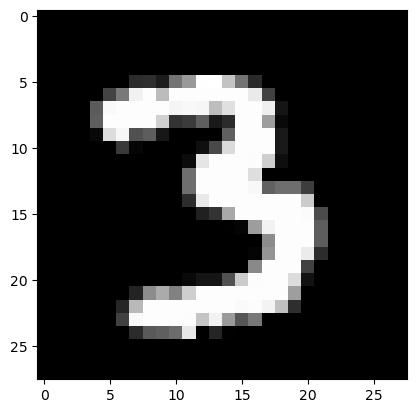

In [3]:
# Визуализация случайного изображения
plt.imshow(Image.fromarray(X_test_org[500]).convert('RGBA'))

In [4]:
# Корректировка размерности для подачи в сеть
X_train = X_train_org.reshape(X_train_org.shape[0], 28*28)
X_test = X_test_org.reshape(X_test_org.shape[0], 28*28)

In [5]:
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 255 - глубина изображения
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# Кодируем целевой выход
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)
# Совпдадает с тройкой на изображении
np.argmax(y_test[500])

3

Epoch 1/30
120/120 [==============================] - 1s 7ms/step - loss: 0.4770 - accuracy: 0.8591 - val_loss: 0.2093 - val_accuracy: 0.9373
Epoch 2/30
120/120 [==============================] - 1s 6ms/step - loss: 0.1855 - accuracy: 0.9445 - val_loss: 0.1472 - val_accuracy: 0.9555
Epoch 3/30
120/120 [==============================] - 1s 6ms/step - loss: 0.1277 - accuracy: 0.9617 - val_loss: 0.1249 - val_accuracy: 0.9622
Epoch 4/30
120/120 [==============================] - 1s 6ms/step - loss: 0.0950 - accuracy: 0.9707 - val_loss: 0.1109 - val_accuracy: 0.9662
Epoch 5/30
120/120 [==============================] - 1s 6ms/step - loss: 0.0738 - accuracy: 0.9776 - val_loss: 0.1045 - val_accuracy: 0.9684
Epoch 6/30
120/120 [==============================] - 1s 6ms/step - loss: 0.0630 - accuracy: 0.9805 - val_loss: 0.0980 - val_accuracy: 0.9711
Epoch 7/30
120/120 [==============================] - 1s 6ms/step - loss: 0.0477 - accuracy: 0.9847 - val_loss: 0.1007 - val_accuracy: 0.9711
Epoch 

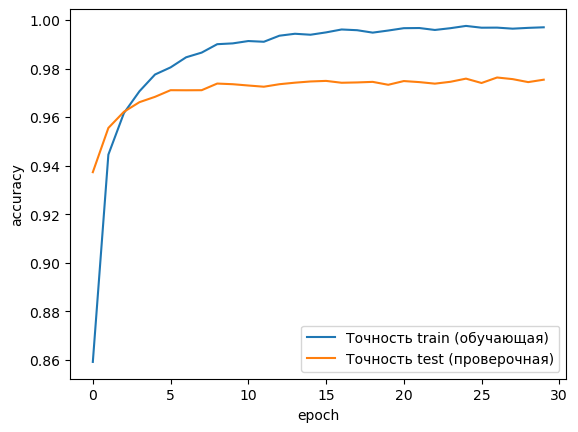

In [7]:
# Создаем нейронную сеть
model = Sequential()
# Входной слой
model.add(Dense(400, input_dim = 28*28, activation = 'relu'))
# Добавляем слой Dropout он поможет избежать переобучения?
# также нейронной сети будет проще обучаться
model.add(Dropout(0.2)) # Параметр - %
# Еще один скрытый слой
model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.2))
# При множественной классификации активационная функция должна быть softmax
model.add(Dense(10, activation = 'softmax'))

# Собираем модель:
# Задаем метрику потерь loss
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
n = 30000 # размер выборки, которая будет подана для обучения
history = model.fit(X_train[:n],
                    y_train[:n],
                    batch_size = 250,
                    epochs = 30,
                    validation_data = (X_train[n:], y_train[n:]),
                    verbose = 1)

plt.plot(history.history['accuracy'], label = 'Точность train (обучающая)')
plt.plot(history.history['val_accuracy'], label = 'Точность test (проверочная)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Использование сверточной нейронной сети

In [8]:
# Conv2D - для сверточной нейронной сети
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, GlobalAveragePooling2D
(X_train_org, y_train_org), (X_test_org, y_test_org) = mnist.load_data()

In [9]:
X_train = X_train.reshape(X_train_org.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test_org.shape[0], 28, 28, 1)
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

Epoch 1/30
120/120 [==============================] - 5s 42ms/step - loss: 0.4865 - accuracy: 0.8657 - val_loss: 0.1973 - val_accuracy: 0.9419
Epoch 2/30
120/120 [==============================] - 5s 42ms/step - loss: 0.1630 - accuracy: 0.9504 - val_loss: 0.1226 - val_accuracy: 0.9633
Epoch 3/30
120/120 [==============================] - 5s 43ms/step - loss: 0.1035 - accuracy: 0.9687 - val_loss: 0.0887 - val_accuracy: 0.9729
Epoch 4/30
120/120 [==============================] - 5s 43ms/step - loss: 0.0785 - accuracy: 0.9776 - val_loss: 0.0780 - val_accuracy: 0.9767
Epoch 5/30
120/120 [==============================] - 6s 50ms/step - loss: 0.0597 - accuracy: 0.9828 - val_loss: 0.0713 - val_accuracy: 0.9788
Epoch 6/30
120/120 [==============================] - 6s 46ms/step - loss: 0.0498 - accuracy: 0.9854 - val_loss: 0.0665 - val_accuracy: 0.9797
Epoch 7/30
120/120 [==============================] - 6s 46ms/step - loss: 0.0421 - accuracy: 0.9878 - val_loss: 0.0642 - val_accuracy: 0.9805

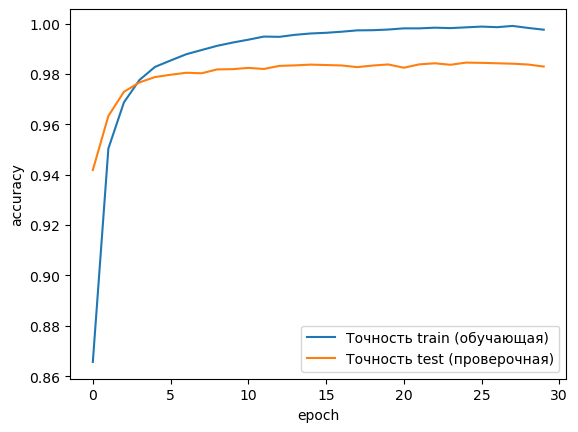

In [10]:
# Создаем нейронную сеть
model = Sequential()
# Входной слой
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
# Полносвязные слои
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
n = 30000 # размер выборки, которая будет подана для обучения
history = model.fit(X_train[:n],
                    y_train[:n],
                    batch_size = 250,
                    epochs = 30,
                    validation_data = (X_train[n:], y_train[n:]),
                    verbose = 1)

plt.plot(history.history['accuracy'], label = 'Точность train (обучающая)')
plt.plot(history.history['val_accuracy'], label = 'Точность test (проверочная)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()